W wyniku pracy do przyszłego tygodnia powinna powstać pierwsza część
sumarycznego raportu który obejmować będzie ćwiczenia 1-4 oraz kod
przekształcający dane do macierzy cech liczbowych (przykłady × cechy).



In [79]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno

heart_disease = fetch_ucirepo(id=45) 
  
x = heart_disease.data.features 
y = heart_disease.data.targets 

In [80]:
print(heart_disease.metadata)
print()
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

Czy zbiór jest zbalansowany pod względem liczby próbek na klasy?

Rozkład klas w zbiorze danych:
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64


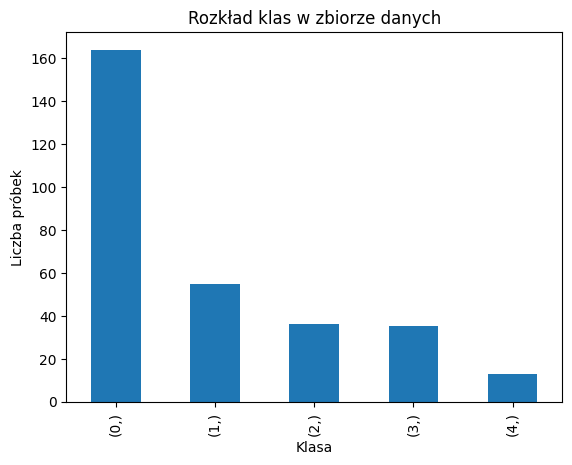

In [81]:
# Sprawdź unikalne wartości w zmiennej docelowej i ich liczność
class_distribution = y.value_counts()

print("Rozkład klas w zbiorze danych:")
print(class_distribution)

# Wizualizacja
class_distribution.plot(kind='bar')
plt.title('Rozkład klas w zbiorze danych')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.show()

Rozkład klas w znormalizowanym zbiorze danych:
num
0      164
1      139
Name: count, dtype: int64


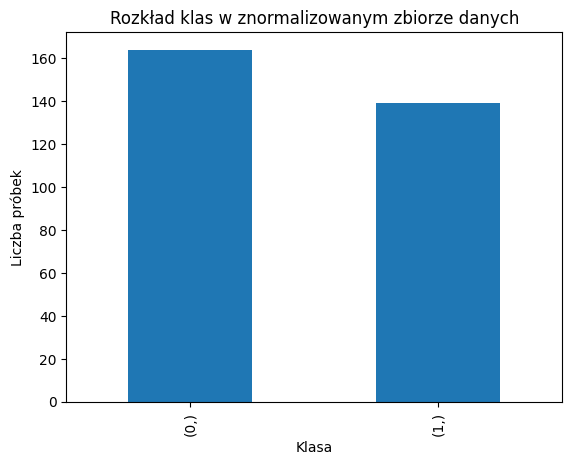

In [82]:
class_distribution_normalised = y.replace({1: 1, 2: 1, 3: 1, 4: 1}).value_counts()

print("Rozkład klas w znormalizowanym zbiorze danych:")
print(class_distribution_normalised)

# Wizualizacja
class_distribution_normalised.plot(kind='bar')
plt.title('Rozkład klas w znormalizowanym zbiorze danych')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.show()

Jakie są średnie i odchylenia cech liczbowych?

In [83]:
numerical_values = x.iloc[:, [0,3,4,7,9,11]]
print('\033[1m'"Cechy liczbowe"'\033[0m')
print(numerical_values)
print()
print('\033[1m'"Wartości średnie"'\033[0m')
print(numerical_values.mean())
print()
print('\033[1m'"Odchylenia cech liczbowych"'\033[0m')
print(numerical_values.std())

Cechy liczbowe
     age  trestbps  chol  thalach  oldpeak   ca
0     63       145   233      150      2.3  0.0
1     67       160   286      108      1.5  3.0
2     67       120   229      129      2.6  2.0
3     37       130   250      187      3.5  0.0
4     41       130   204      172      1.4  0.0
..   ...       ...   ...      ...      ...  ...
298   45       110   264      132      1.2  0.0
299   68       144   193      141      3.4  2.0
300   57       130   131      115      1.2  1.0
301   57       130   236      174      0.0  1.0
302   38       138   175      173      0.0  NaN

[303 rows x 6 columns]

Wartości średnie
age          54.438944
trestbps    131.689769
chol        246.693069
thalach     149.607261
oldpeak       1.039604
ca            0.672241
dtype: float64

Odchylenia cech liczbowych
age          9.038662
trestbps    17.599748
chol        51.776918
thalach     22.875003
oldpeak      1.161075
ca           0.937438
dtype: float64


Dla cech liczbowych: czy ich rozkład jest w przybliżeniu normalny?

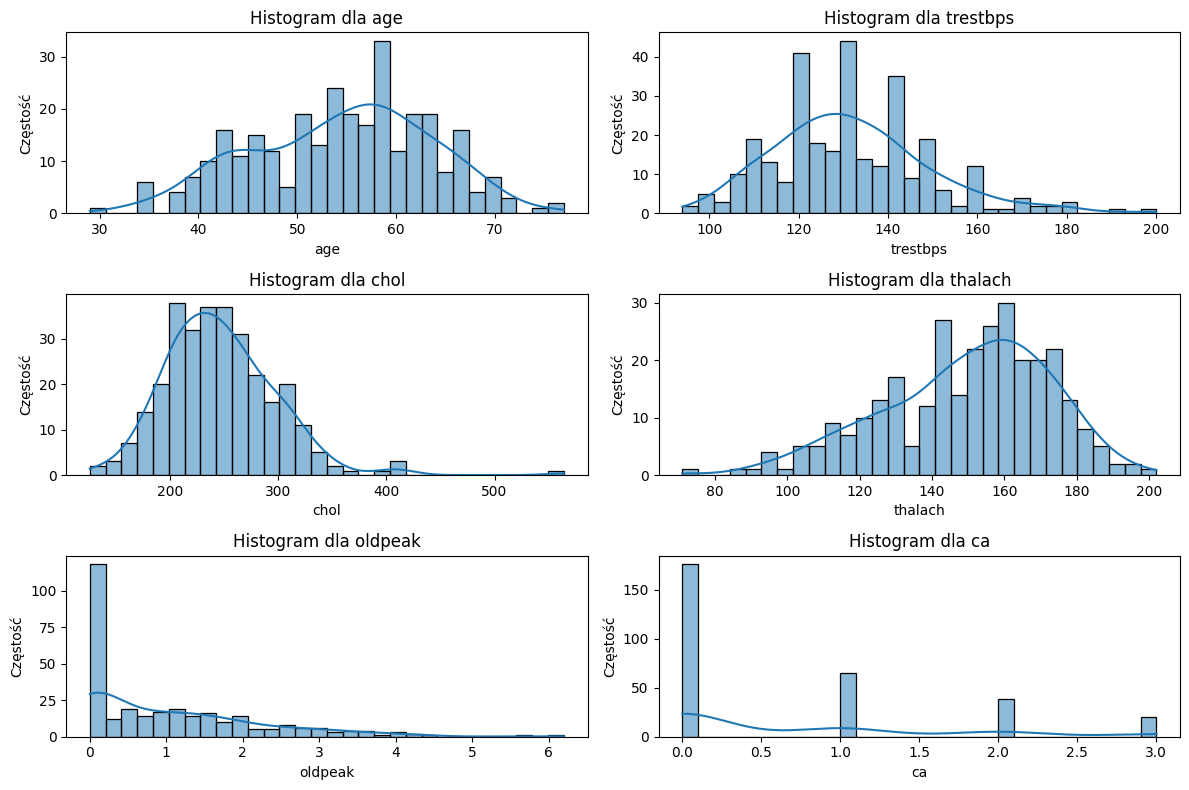

In [84]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical_values.columns, 1):
    plt.subplot(3, 2, i)  # 3 wiersze, 2 kolumny
    sns.histplot(numerical_values[column], kde=True, bins=30)
    plt.title(f'Histogram dla {column}')
    plt.xlabel(column)
    plt.ylabel('Częstość')

plt.tight_layout()
plt.show()

Dla cech kategorycznych: czy rozkład jest w przybliżeniu równomierny?

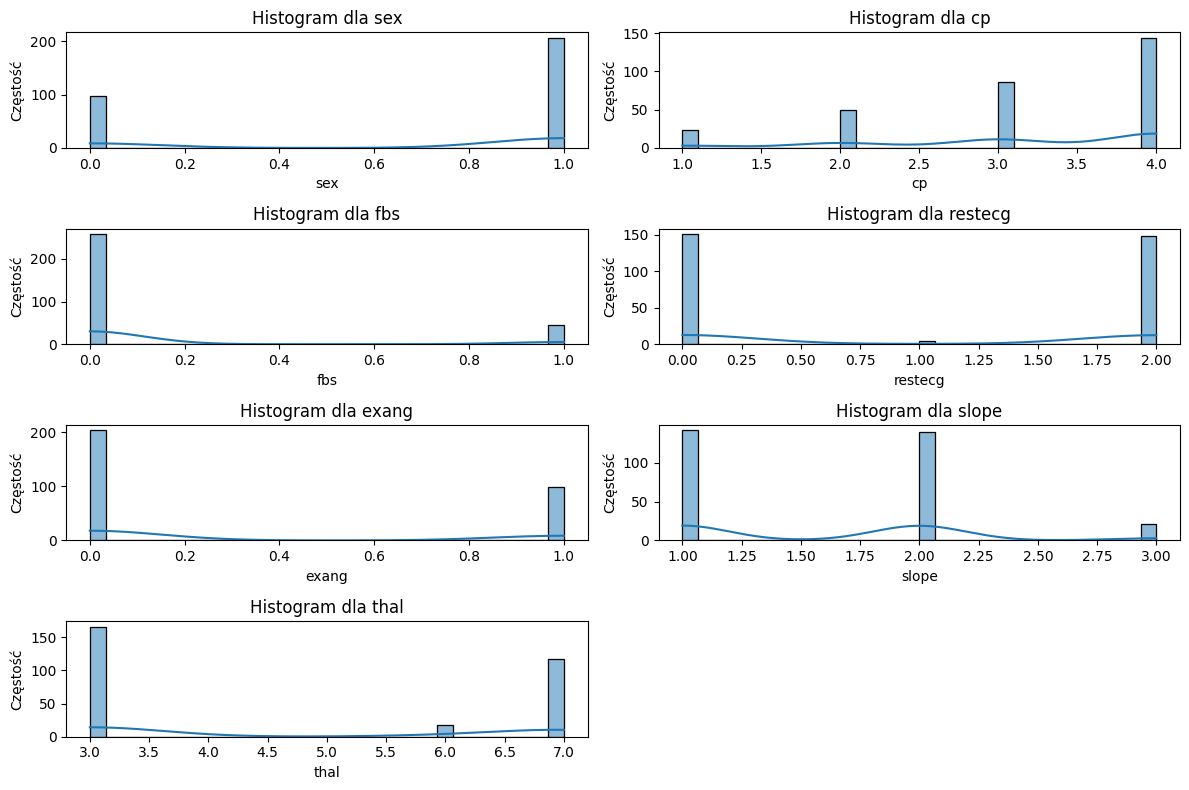

In [85]:
categorical_values = x.iloc[:, [1,2,5,6,8,10,12]]
plt.figure(figsize=(12, 8))

for i, column in enumerate(categorical_values.columns, 1):
    plt.subplot(4, 2, i)  # 3 wiersze, 2 kolumny
    sns.histplot(categorical_values[column], kde=True, bins=30)
    plt.title(f'Histogram dla {column}')
    plt.xlabel(column)
    plt.ylabel('Częstość')

plt.tight_layout()
plt.show()

Czy występują cechy brakujące i jaką strategię możemy zastosować żeby je
zastąpić?


Brakujące dane w każdej kolumnie:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


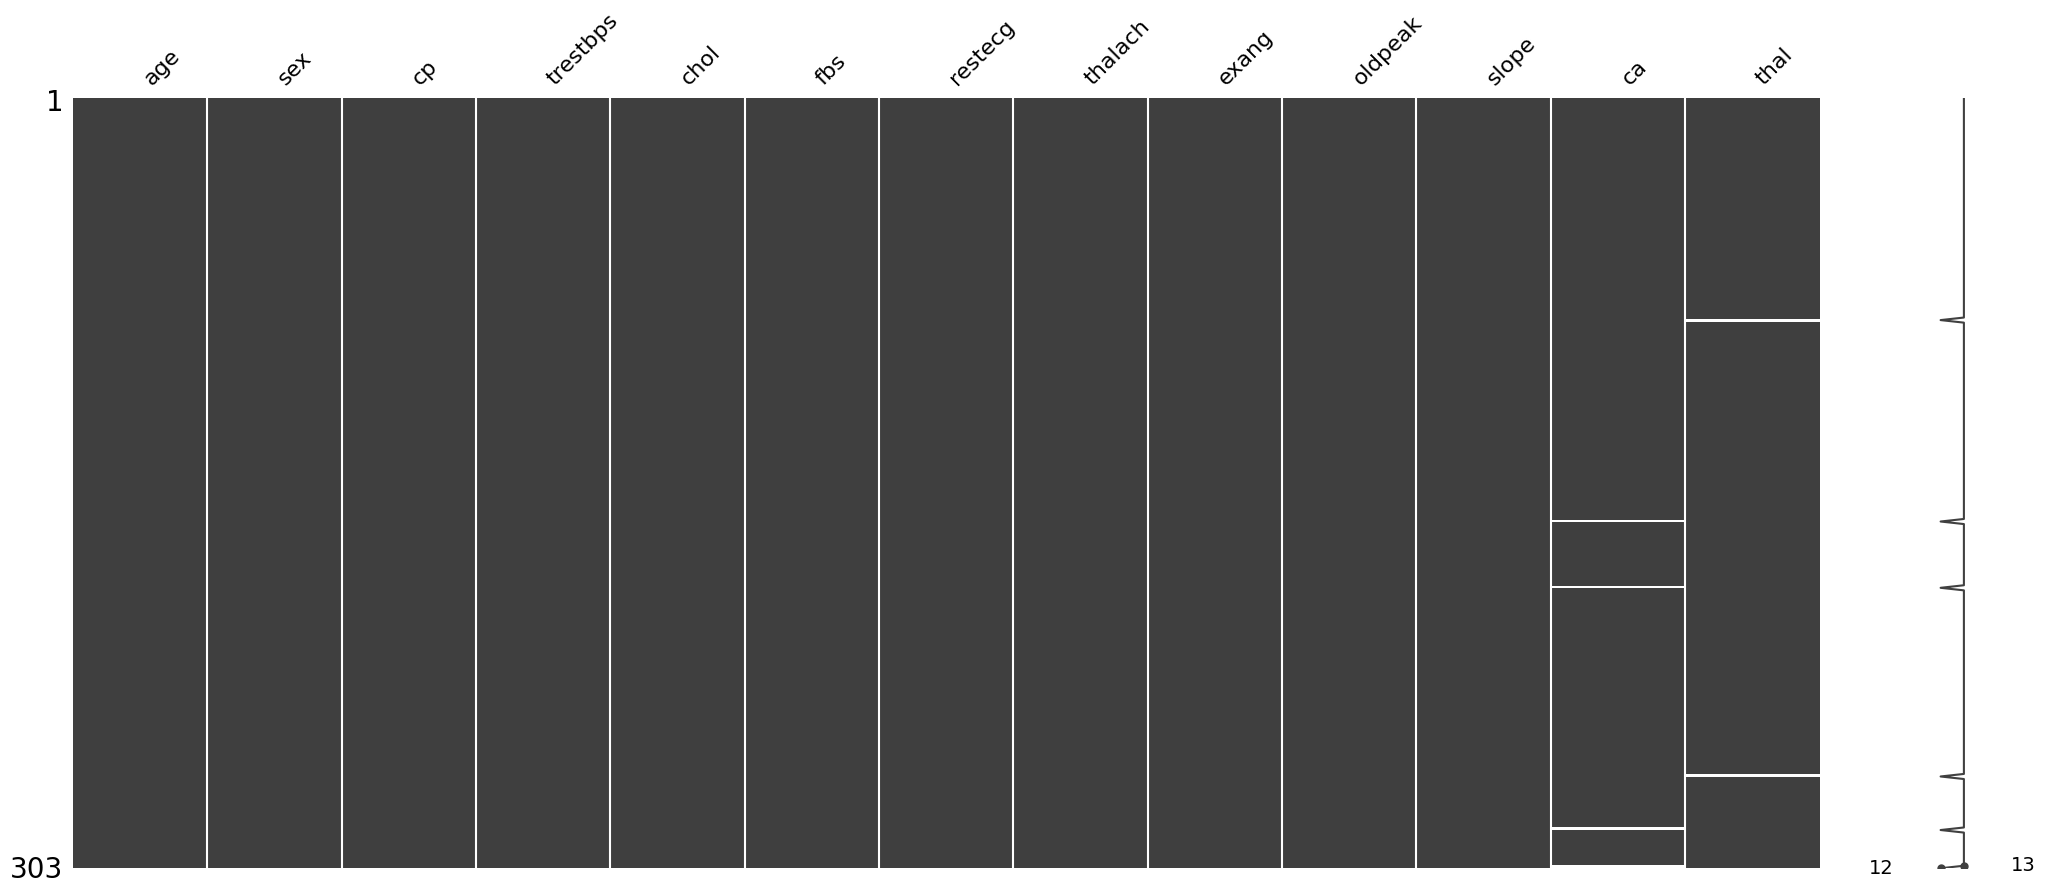

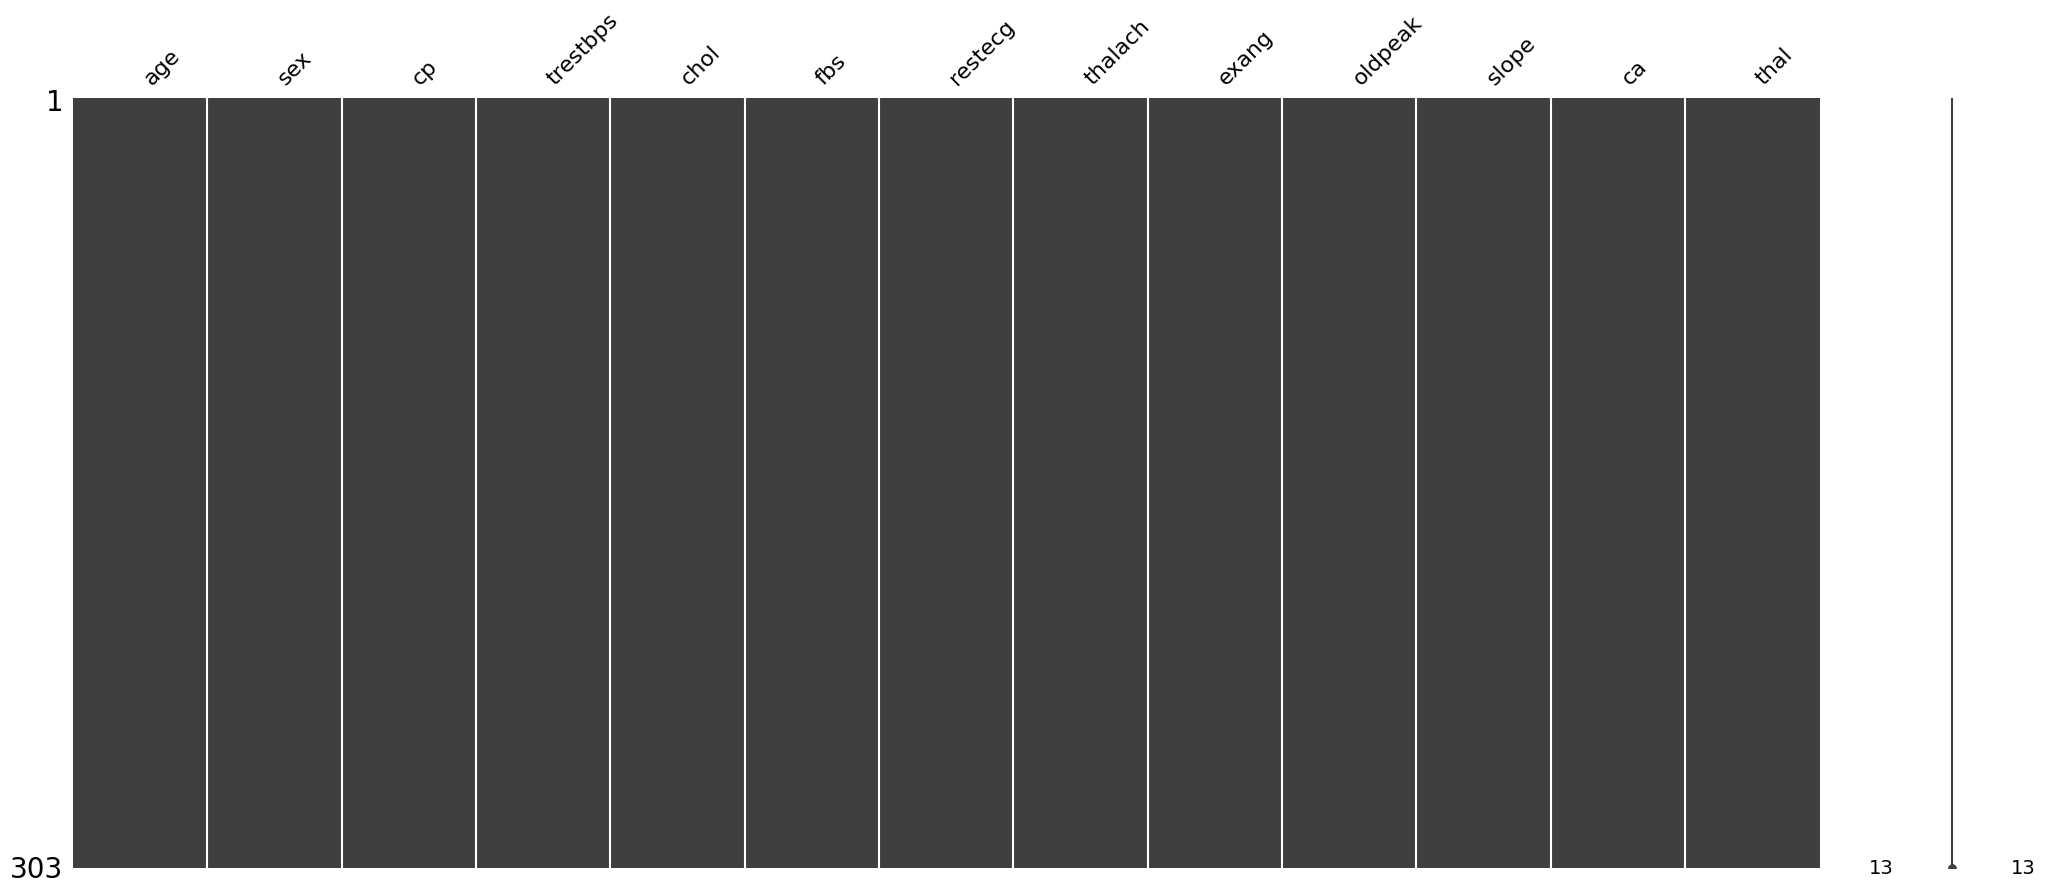

In [86]:
missing_values = heart_disease.data.features.isnull().sum()
print("Brakujące dane w każdej kolumnie:")
print(missing_values)

msno.matrix(x)
plt.show()

x_filled_median = x.fillna(x.median())

msno.matrix(x_filled_median)
plt.show()

In [87]:
numerical_values_filled = numerical_values.fillna(numerical_values.median())
print(numerical_values_filled)

     age  trestbps  chol  thalach  oldpeak   ca
0     63       145   233      150      2.3  0.0
1     67       160   286      108      1.5  3.0
2     67       120   229      129      2.6  2.0
3     37       130   250      187      3.5  0.0
4     41       130   204      172      1.4  0.0
..   ...       ...   ...      ...      ...  ...
298   45       110   264      132      1.2  0.0
299   68       144   193      141      3.4  2.0
300   57       130   131      115      1.2  1.0
301   57       130   236      174      0.0  1.0
302   38       138   175      173      0.0  0.0

[303 rows x 6 columns]
